**Importing Necessary Libraries**

In [1]:
# Importing necessary libraries
import numpy as np  # Used for array operations
import scipy.io  # To load .mat files (EEG data)
import tensorflow as tf  # For deep learning tasks
from google.colab import drive  # For accessing Google Drive
import os  # Used to handle file system operations
import pandas as pd
from pprint import pprint

**Manage GPU memory**

In [2]:
# Manage GPU memory usage to prevent out of memory (OOM) errors
# This makes TensorFlow allocate memory dynamically as needed
try:
  physical_devices = tf.config.list_physical_devices('GPU')
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print(f"GPU is available: {physical_devices}")
except:
  print("No GPU Found or TensorFlow Unable To Allocate Memory Dynamically.")

GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**Mounting Google Drive to access data**

In [3]:
# Mounting Google Drive to access data
drive.mount('/content/drive/',force_remount=True)  # Mounting Google Drive where your data is stored

Mounted at /content/drive/


**Processing Files**

In [4]:
# Here you would load and process the single file, for example:

#Define the Data Directory
data_dir = '/content/drive/MyDrive/colab_notebook/motor_img_class/data/BCICIV_1_mat/'

#verify the the directory exists before processing
if not os.path.exists(data_dir):
  raise ValueError(f"Data Directory {data_dir} not found. Check the path.")

#Define the specific file you to process
filename = 'BCICIV_calib_ds1d.mat'  # Modify this if you want to process a different file
path_file = os.path.join(data_dir,filename)

#check if the sepfic file exisits before proceeding
if not os.path.exists(path_file):
  raise FileNotFoundError(f"File {filename} not found in {data_dir}")

print(f"Processing file: {filename}")

Processing file: BCICIV_calib_ds1d.mat


In [5]:
# Load the .mat file containing the EEG data
# The 'struct_as_record=True' option ensures that MATLAB structs are treated as Python objects
m = scipy.io.loadmat(path_file, struct_as_record=True)

In [6]:
#Display the top-level keys in the loaded data to see the structure
print("Top Level Keys in the loaded .mat file:")
pprint(m.keys())
#To inspect the data types of each key
for key in m.keys():
  print(f"Type of {key}: {type(m[key])}")

Top Level Keys in the loaded .mat file:
dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])
Type of __header__: <class 'bytes'>
Type of __version__: <class 'str'>
Type of __globals__: <class 'list'>
Type of mrk: <class 'numpy.ndarray'>
Type of cnt: <class 'numpy.ndarray'>
Type of nfo: <class 'numpy.ndarray'>


In [7]:
# To inspect 'nfo', display its fields (if it's a structured array or dict-like object)
if 'nfo' in m:
    print("\nFields in 'nfo':", m['nfo'].dtype.names)

# Inspect the EEG data (if present)
if 'cnt' in m:
    print(f"\nShape in 'cnt' (EEG data): Time points: {m['cnt'].shape[0]}, #channels:{m['cnt'].shape[1]}")  # Shape should be (time points, channels)

# Inspect marker (mrk) data (if present)
if 'mrk' in m:
    print("\nFields in 'mrk':", m['mrk'].dtype.names)


Fields in 'nfo': ('fs', 'classes', 'clab', 'xpos', 'ypos')

Shape in 'cnt' (EEG data): Time points: 190473, #channels:59

Fields in 'mrk': ('pos', 'y')


In [8]:
# Extract the array that contains the channel names from 'nfo'
if 'clab' in m['nfo'].dtype.names:
    channel_names = [ch[0] for ch in m['nfo']['clab'][0][0][0]]  # Use list comprehension

    # Print the extracted channel names
    print("Extracted channel names:\n", channel_names)

Extracted channel names:
 ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']


In [9]:
# Extract the array that contains the channel names
channel_data = m['nfo']['clab'][0][0][0]

# Use a loop to extract each channel name
channel_names = []

for value in channel_data:
  channel_names.append(value[0])

# Print the extracted channel names
print("extracted channel names:\n",channel_names)

# Extract channel names from the loaded data
# 'nfo' contains meta-information, and 'clab' contains the labels of the EEG channels
#channel_names = [s[0] for s in m['nfo']['clab'][0][0][0]]  # Extract channel labels

extracted channel names:
 ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']


In [10]:
# Extract event information (cue positions and class labels)
# 'mrk' contains marker information about the motor imagery events
event_onsets = m['mrk'][0][0][0].flatten()  # Positions where cues were given (start of motor imagery) / the values represent time points where the motor imagery cues were given. (eg. at 2095 time point, a motor imagery started.)
event_codes = m['mrk'][0][0][1].flatten() # Corresponding class labels for each cue (-1 or 1). class labels for each of those time points.
print(f"event_onsets:\n {event_onsets}\n event_codes: {event_codes}") # there are about 200 cues happened in this experiement or file.

event_onsets:
 [  2095   2895   3695   4495   5295   6095   6895   7695   8495   9295
  10095  10895  11695  12495  13295  16294  17094  17894  18694  19494
  20294  21094  21894  22694  23494  24295  25095  25895  26695  27495
  30494  31294  32094  32894  33694  34494  35294  36094  36894  37694
  38494  39294  40094  40894  41694  44693  45493  46293  47093  47893
  48693  49493  50293  51093  51893  52693  53493  54293  55093  55893
  58892  59692  60492  61292  62092  62892  63692  64492  65292  66093
  66893  67693  68493  69293  70093  73092  73892  74692  75492  76292
  77092  77892  78692  79492  80292  81092  81892  82692  83492  84292
  87291  88091  88891  89691  90491  91291  92091  92891  93691  94491
  97292  98092  98892  99692 100492 101292 102092 102892 103692 104492
 105292 106092 106892 107692 108492 111491 112291 113091 113891 114691
 115491 116291 117091 117891 118691 119492 120292 121091 121891 122692
 125691 126491 127291 128091 128891 129691 130491 131291 13209

In [11]:
# Extract sample rate from the 'nfo' structure
# This is the rate at which the EEG data was recorded (e.g., 100 Hz means 100 samples per second)
sample_rate = m['nfo']['fs'][0][0][0][0]

In [12]:
# Initialize an array to store labels for the entire duration of the EEG recording
# 'nsamples' refers to the number of time points in the data
nsamples = m['cnt'].shape[0]  # Number of time points (samples) in the continuous EEG signal
labels = np.zeros((1, nsamples),int)  # Create an array of zeros with the same number of samples

# Populate the labels array with event codes (-1 for class 1, 1 for class 2) at the event onsets
labels[0, event_onsets]

print(f"Number of samples (Data Points) = {nsamples}")

Number of samples (Data Points) = 190473


In [13]:
# Extract the class labels (motor imagery tasks) from the 'nfo' structure
class_data = m['nfo']['classes'][0][0][0]
cl_lab = []

for s in class_data:
  cl_lab.append(s[0])

cl1 = cl_lab[0]  # Label for class 1 (e.g., 'left hand')
cl2 = cl_lab[1]  # Label for class 2 (e.g., 'right hand')
print(f"Class Labels are: {cl1,cl2}")

Class Labels are: ('left', 'right')


In [14]:
# Determine the number of classes and the number of events
nclasses = len(cl_lab)  # The number of motor imagery classes (2 in this case)
nevents =  len(event_onsets) # The number of motor imagery events (number of times cues were given)

# Extract the continuous EEG signal from the 'cnt' field and transpose it
# The data is in the format [time x channels], but we transpose it to [channels x time]
EEG = m['cnt'].T  # Transposing so that rows are channels and columns are time points. in Matlab usually is [timeXchannels] while in python is [channelsXtime], which is eaiser to work with as this is common for EEG processing and ML tools.

# Get the number of channels (electrodes) and the number of time points (samples)
nchannels, nsamples = EEG.shape  # Shape of the EEG data: 59 channels and number of sampleslen(event_onsets)

In [15]:
# Improved printing of key information about the EEG data

print(f"{'-'*40}")
print(f"{'EEG Data Summary':^40}")  # Centered title for EEG data summary
print(f"{'-'*40}")

# Print the shape of the EEG data
print(f"Shape of EEG Data: {EEG.shape[0]} channels x {EEG.shape[1]} time points")

# Print the sample rate (with units)
print(f"Sample Rate: {sample_rate} Hz")

# Print the number of channels and limit the display of channel names
print(f"Number of Channels: {nchannels}")
print(f"Channel Names (First 10): {channel_names[:10]}... [+{len(channel_names) - 10} more]"
      if len(channel_names) > 10 else f"Channel Names: {channel_names}")

# Print the number of events (with a brief explanation)
print(f"Number of Motor Imagery Events: {nevents}")

# Display unique event codes (only -1 and 1 expected, but generalized in case of unexpected values)
unique_event_codes = np.unique(event_codes)
print(f"Unique Event Codes: {unique_event_codes} (e.g., -1 = left hand, 1 = right hand)")

# Print the class labels for motor imagery tasks
print(f"Motor Imagery Class Labels: {cl_lab}")

# Print the number of classes (this is mostly fixed at 2)
print(f"Number of Motor Imagery Classes: {nclasses}")

print(f"{'-'*40}")


----------------------------------------
            EEG Data Summary            
----------------------------------------
Shape of EEG Data: 59 channels x 190473 time points
Sample Rate: 100 Hz
Number of Channels: 59
Channel Names (First 10): ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5']... [+49 more]
Number of Motor Imagery Events: 200
Unique Event Codes: [-1  1] (e.g., -1 = left hand, 1 = right hand)
Motor Imagery Class Labels: ['left', 'right']
Number of Motor Imagery Classes: 2
----------------------------------------


In [16]:
# Create the DataFrame where rows are channels and columns are time points
# We are using the channel names as the row index and time points as columns
eeg_df = pd.DataFrame(EEG[:, :500], index=channel_names)

# Display the first few rows of the DataFrame to observe the structure of the data
print("EEG data (first 5 channels):")
display(eeg_df.head(5))  # Show the first 5 rows of the data (which will be the first 5 channels)

# Check if event_onsets and event_codes are multidimensional and flatten them if necessary
if event_onsets.ndim > 1:
    event_onsets = event_onsets.flatten()

if event_codes.ndim > 1:
    event_codes = event_codes.flatten()


# Create a DataFrame with two columns: 'Cues' for event_onsets and 'Labels' for event_codes
labels_df = pd.DataFrame({'Motor Imagery Cues': event_onsets, 'Labels': event_codes})

print("Labels (first 5 time points):")
display(labels_df.head(100))  # Show the first 5 rows of the labels

EEG data (first 5 channels):


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
AF3,-36,-203,-384,-354,-302,-338,-351,-387,-403,-381,...,-438,-408,-411,-410,-364,-335,-349,-353,-269,-173
AF4,-138,-774,-1463,-1381,-1232,-1320,-1311,-1449,-1499,-1469,...,377,370,387,370,410,367,240,156,189,229
F5,-50,-280,-517,-460,-396,-440,-420,-461,-483,-437,...,-517,-516,-532,-510,-468,-461,-467,-484,-436,-341
F3,-34,-190,-360,-337,-293,-321,-316,-334,-360,-338,...,-516,-489,-499,-503,-477,-461,-467,-470,-429,-372
F1,-24,-137,-265,-249,-203,-226,-236,-258,-295,-279,...,-376,-356,-366,-348,-305,-298,-302,-300,-262,-188


Labels (first 5 time points):


,Motor Imagery Cues,Labels
0,2095,1
1,2895,1
2,3695,1
3,4495,-1
4,5295,1
...,...,...
95,91291,1
96,92091,-1
97,92891,-1
98,93691,-1


In [17]:
"""Why Is This Window Important?
This time window is critical because it allows you to focus on the brain's response during a specific time period after the motor imagery cue was given.
For motor imagery tasks, brain responses often become more pronounced a little after the cue onset, which is why you start from 0.5 seconds and go up to 2.5 seconds to capture the brain's response."""

"""
Define a time window for extracting EEG data around motor imagery events.

The chosen window (0.5 to 2.5 seconds after cue onset) is critical for analyzing motor imagery tasks.
This window captures the brain's response to motor imagery tasks like 'left hand' or 'right hand' movement.
Motor imagery responses typically become prominent a short time after the cue (around 0.5 seconds),
so this window helps focus on the relevant brain activity while avoiding noise from the cue onset.

Parameters:
- window_start: Time (in seconds) after the cue onset to start the window.
- window_end: Time (in seconds) after the cue onset to end the window.
- sample_rate: Sampling rate of the EEG data (in Hz), used to convert seconds into sample indices.
"""


# Define a dictionary to store trials for each class (cl1 and cl2)
trials = {}

# Define time window parameters (make these configurable)
window_start = 0.5  # Start at 0.5 seconds
window_end = 2.5    # End at 2.5 seconds

# Define the window of time to extract around each motor imagery event
win = np.arange(int(window_start * sample_rate), int(window_end * sample_rate))  # Flexible window
nsamples = len(win)  # The number of samples in the defined window

# You can print out the window size to verify
print(f"Window size: {window_start}s to {window_end}s, total samples in window: {nsamples}")

# Print the first few sample indices to verify the time window (for debugging purposes)
print(f"Sample indices in the window: {win[:5]} ... {win[-5:]}")  # Print first and last few sample indices

# Define the EEG data range
n_total_samples = EEG.shape[1]  # Total number of samples in the EEG recording

# Ensure that the window fits within the EEG data
for onset in event_onsets:
    if onset + win[-1] >= n_total_samples or onset + win[0] < 0:
        print(f"Warning: Event at {onset} cannot have a full time window.")
        # Handle this case (e.g., by skipping or adjusting the window)

Window size: 0.5s to 2.5s, total samples in window: 200
Sample indices in the window: [50 51 52 53 54] ... [245 246 247 248 249]


In [18]:
# Sample rate check
expected_sample_rate = 100  # Define an expected sample rate (based on prior knowledge of the dataset)
if sample_rate != expected_sample_rate:
    raise ValueError(f"Unexpected sample rate: {sample_rate}. Expected: {expected_sample_rate}.")

**Selecting a time window around the event onset (like win in your code) is critically important for analyzing brain activity associated with specific tasks or stimuli. In your case, you're working with motor imagery tasks—where the subject imagines moving a part of their body (e.g., left hand or right hand). Here's why defining a window like win is important in EEG analysis:**

1. Capturing Task-Related Brain Activity
EEG data is recorded continuously, and much of the signal doesn't directly relate to the task you're studying. Defining a time window around event onsets helps you focus on the brain activity specifically triggered by the task (in this case, motor imagery).
For motor imagery tasks, neural responses (like changes in sensorimotor rhythms) don't occur instantaneously but typically within a few hundred milliseconds to a couple of seconds after the cue onset.
By extracting data from 0.5 to 2.5 seconds after the cue onset, you are isolating the time period when the brain is likely actively responding to the task.
2. Avoiding Initial Transient Activity
The first few milliseconds after the onset of an event (e.g., cue presentation) often involve transient responses, such as sensory processing, preparation, or eye movements. These might not reflect the actual motor imagery process that you're interested in.
Starting the window at 0.5 seconds helps you avoid capturing these initial transient effects, allowing you to focus on the more sustained brain responses associated with motor imagery.
3. Minimizing Noise and Artifacts
EEG data is inherently noisy, with artifacts such as eye blinks, muscle movements, or environmental noise that may occur at various times. By focusing on a well-defined window (like from 0.5 to 2.5 seconds), you can reduce the influence of random noise or artifacts that might happen before or after the task-related activity.
Additionally, artifacts or brain processes unrelated to motor imagery are more likely to occur at different time points. Limiting your analysis to a specific window helps reduce the impact of irrelevant data.
4. Targeting Key Cognitive Processes
In motor imagery experiments, critical neural processes—such as sensorimotor rhythm modulation (e.g., mu and beta rhythms)—are most prominent during a specific window after the onset of the task.
Motor imagery is usually accompanied by event-related desynchronization (ERD) and event-related synchronization (ERS) in sensorimotor rhythms. These changes occur a little after the cue and can last for a couple of seconds. The 0.5 to 2.5 seconds window is appropriate because it includes the most relevant period for observing these changes.
5. Improving Signal-to-Noise Ratio (SNR)
When you analyze EEG data, you're often dealing with a poor signal-to-noise ratio (SNR) because EEG signals from the brain are very weak and can easily be overshadowed by other sources of noise.
By focusing on the most relevant time window—where the task-related brain activity is strongest—you can maximize the signal while minimizing noise. This improves the reliability of your analysis, especially if you plan to classify or detect motor imagery states based on EEG data.
6. Standardizing Analysis Across Trials
By defining a fixed window (e.g., from 0.5 to 2.5 seconds), you ensure that your analysis is consistent across all trials. For each motor imagery event, you're analyzing brain activity from the same time period relative to the cue onset.
This makes it easier to compare different trials and perform machine learning or statistical analysis because the same time period is extracted for each event.
7. Time-Locking EEG Analysis
In event-related analysis (such as event-related potentials or event-related desynchronization), you often "time-lock" your analysis to the onset of a task or event. This means you align all trials so that the EEG data is analyzed in relation to a common reference point (the cue onset).
The win variable allows you to define the precise time points after the event that you want to analyze, enabling you to perform time-locked analysis where you can average across trials or apply machine learning models to detect patterns associated with the motor imagery task.
EEG Processing Applications for the Window:
Event-Related Desynchronization (ERD) / Synchronization (ERS):

In motor imagery, changes in brain rhythms (especially in the mu and beta bands) reflect whether the subject is imagining a movement. These rhythms often decrease in power (desynchronization) when imagining movement and increase again (synchronization) after the task.
The window from 0.5 to 2.5 seconds after the cue helps capture this desynchronization and resynchronization, which are critical for detecting motor imagery.
Feature Extraction for Classification:

If you're using machine learning to classify motor imagery tasks, the windowed data can be used to extract features such as power in different frequency bands (mu, beta) or spatial features using common spatial patterns (CSP).
Defining a consistent window ensures that you extract relevant features from the same time period for every trial, improving the accuracy of classification models.
Signal Averaging:

To reduce noise and improve the clarity of brain signals, you might average the EEG signal over multiple trials. By extracting the same time window (0.5 to 2.5 seconds after the cue) for each trial, you can average these windows to get a clearer view of the brain's response to motor imagery.

In [19]:
# Print more informative messages
for cl, code in zip(cl_lab, np.unique(event_codes)):
    cl_onsets = event_onsets[event_codes == code]

    # If no onsets found for this class, skip and notify
    if len(cl_onsets) == 0:
        print(f"No trials found for class {cl} (code: {code}).")
        continue

    # Initialize trials array
    print(f"Processing class {cl} with {len(cl_onsets)} trials.")
    trials[cl] = np.zeros((nchannels, nsamples, len(cl_onsets)))

    for i, onset in enumerate(cl_onsets):
        if onset + win[-1] >= EEG.shape[1] or onset + win[0] < 0:
            print(f"Warning: Skipping trial at onset {onset}. Window exceeds data boundaries.")
            continue

        # Extract the trial
        trials[cl][:, :, i] = EEG[:, win + onset]

    # Print confirmation when done
    print(f"Class {cl} processed. Shape of trials: {trials[cl].shape}")

print(f"Final shapes: Trials[cl1]: {trials[cl1].shape}, Trials[cl2]: {trials[cl2].shape}")

Processing class left with 100 trials.
Class left processed. Shape of trials: (59, 200, 100)
Processing class right with 100 trials.
Class right processed. Shape of trials: (59, 200, 100)
Final shapes: Trials[cl1]: (59, 200, 100), Trials[cl2]: (59, 200, 100)



This code processes EEG data by extracting specific time-windowed segments around motor imagery events (e.g., imagining left-hand or right-hand movement). It organizes these EEG segments into trials for two classes, such as "left" and "right". Here's a brief breakdown:

Event Onsets and Event Codes: The event_onsets array provides the time points when motor imagery events occurred, and event_codes labels each event (e.g., -1 for "left", 1 for "right").

EEG Trials Extraction: For each class, the code extracts a time window of EEG data (e.g., from 0.5 to 2.5 seconds after the event) for all EEG channels. The extracted segments are stored in a 3D array (trials[cl]) with dimensions representing:

nchannels: Number of EEG channels (electrodes).
nsamples: Number of time points (samples) in the time window.
len(cl_onsets): Number of motor imagery events (trials).
Purpose: This extracted data allows for further analysis, such as machine learning-based classification or feature extraction, related to motor imagery tasks.

Output: The final shape of the EEG trials for each class is printed to verify that the data has been processed correctly.

In [20]:
from matplotlib import mlab

def psd(trials):
    '''
    Calculates for each trial the Power Spectral Density (PSD).

    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEG signal

    Returns
    -------
    trial_PSD : 3d-array (channels x PSD x trials)
        the PSD for each trial.
    freqs : list of floats
        Yhe frequencies for which the PSD was computed (useful for plotting later)
    '''

    ntrials = trials.shape[2]
    trials_PSD = np.zeros((nchannels, 101, ntrials))

    # Iterate over trials and channels
    for trial in range(ntrials):
        for ch in range(nchannels):
            # Calculate the PSD
            (PSD, freqs) = mlab.psd(trials[ch,:,trial], NFFT=int(nsamples), Fs=sample_rate)
            trials_PSD[ch, :, trial] = PSD.ravel()

    return trials_PSD, freqs

**Power Spectral Density (PSD)**
This function calculates the Power Spectral Density (PSD) for each trial of EEG data. The PSD helps analyze how the brain's electrical activity is distributed across different frequencies during motor imagery tasks. For each trial and EEG channel, the function computes the PSD using Fast Fourier Transform (FFT) and stores the results in a 3D array. This information is useful for understanding the power of the signal across different frequency bands, which can be associated with specific brain states or activities.

In [21]:
# Apply the function
psd_r, freqs = psd(trials[cl1])
psd_f, freqs = psd(trials[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}

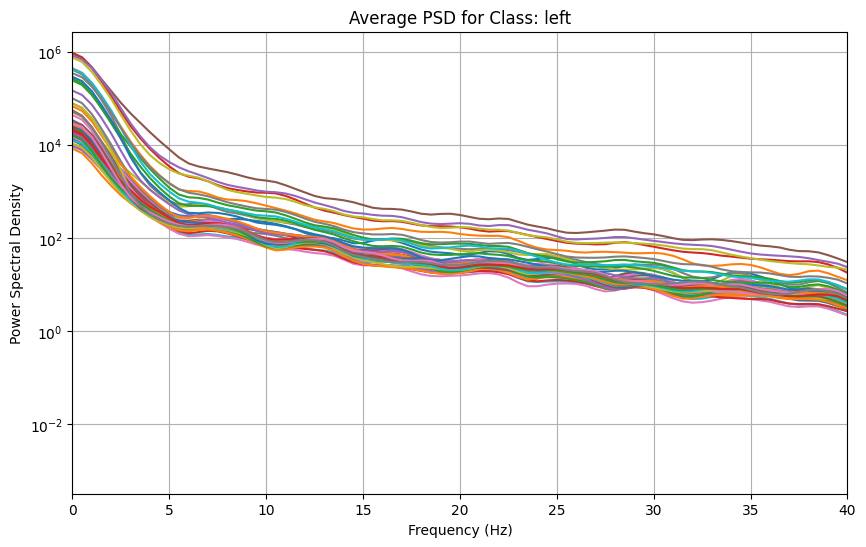

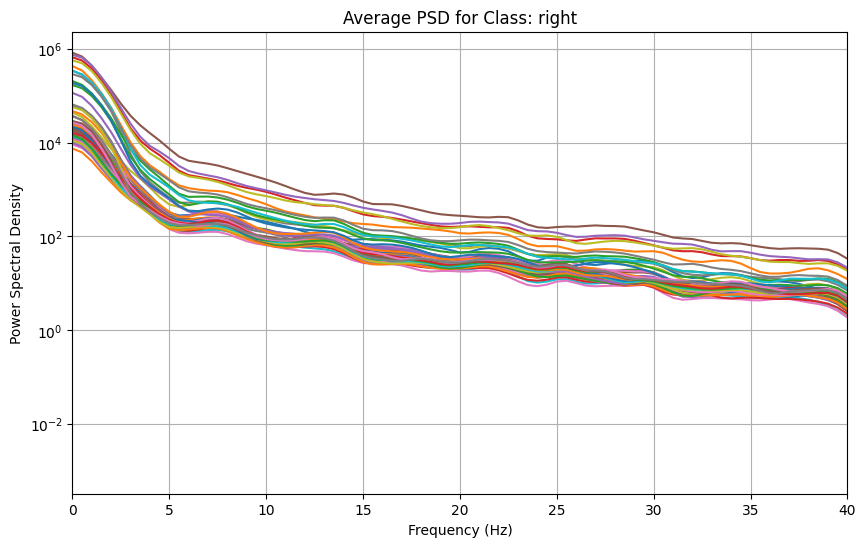

In [22]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def plot_psd(psd_values, freqs, class_label, log_scale=False, smooth=False):
    '''
    Plots the Power Spectral Density for a given class.

    Parameters:
    psd_values : 3D array (channels x freqs x trials)
        The PSD values for the class.
    freqs : 1D array
        The frequencies corresponding to the PSD values.
    class_label : str
        The label for the class being plotted.
    log_scale : bool
        Whether to use a logarithmic scale for the Y-axis.
    smooth : bool
        Whether to apply smoothing to the PSD curves.
    '''
    # Average the PSD across all trials for visualization
    avg_psd = np.mean(psd_values, axis=2)  # Average over trials

    # Optionally apply smoothing
    if smooth:
        avg_psd = gaussian_filter1d(avg_psd, sigma=1, axis=1)

    # Plot the PSD for each channel
    plt.figure(figsize=(10, 6))
    for ch in range(avg_psd.shape[0]):
        plt.plot(freqs, avg_psd[ch], label=f'Channel {ch+1}')

    plt.title(f'Average PSD for Class: {class_label}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')

    if log_scale:
        plt.yscale('log')  # Use logarithmic scale for Y-axis

    plt.xlim(0, 40)  # Focus on frequencies between 0-40 Hz
    plt.grid(True)
    plt.show()

# Plot the PSD for class 1
plot_psd(psd_r, freqs, class_label=cl1, log_scale=True, smooth=True)

# Plot the PSD for class 2
plot_psd(psd_f, freqs, class_label=cl2, log_scale=True, smooth=True)


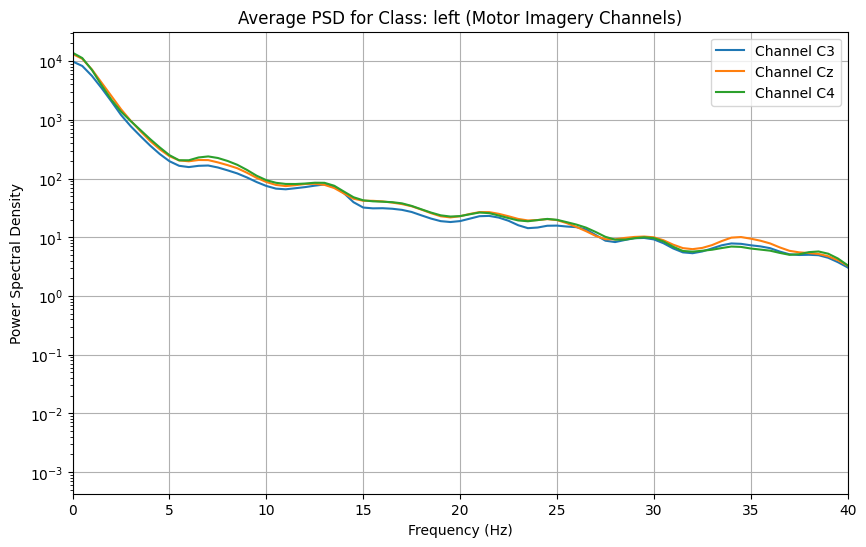

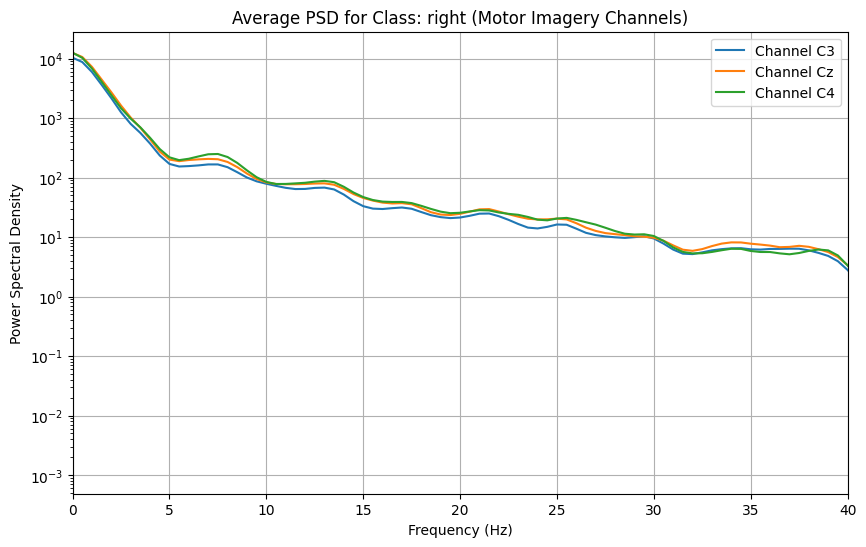

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the PSD for specific channels
def plot_motor_imagery_channels(psd_values, freqs, motor_channels, channel_names, class_label, log_scale=False, smooth=False):
    '''
    Plots the Power Spectral Density (PSD) for specific motor imagery channels.

    Parameters:
    psd_values : 3D array (channels x freqs x trials)
        The PSD values for the class.
    freqs : 1D array
        The frequencies corresponding to the PSD values.
    motor_channels : list
        List of motor imagery channel names (e.g., ['C3', 'Cz', 'C4']).
    channel_names : list
        List of all EEG channel names.
    class_label : str
        The label for the class being plotted (e.g., 'left hand', 'right hand').
    log_scale : bool
        Whether to use a logarithmic scale for the Y-axis.
    smooth : bool
        Whether to apply smoothing to the PSD curves.
    '''

    # Find the indices of the motor imagery channels in the channel_names list
    motor_channel_indices = [channel_names.index(ch) for ch in motor_channels]

    # Average the PSD across all trials for visualization
    avg_psd = np.mean(psd_values, axis=2)  # Average over trials

    # Optionally apply smoothing (Gaussian filter)
    if smooth:
        from scipy.ndimage import gaussian_filter1d
        avg_psd = gaussian_filter1d(avg_psd, sigma=1, axis=1)

    # Plot the PSD for each motor imagery channel
    plt.figure(figsize=(10, 6))
    for idx in motor_channel_indices:
        plt.plot(freqs, avg_psd[idx], label=f'Channel {channel_names[idx]}')

    plt.title(f'Average PSD for Class: {class_label} (Motor Imagery Channels)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')

    if log_scale:
        plt.yscale('log')  # Use logarithmic scale for Y-axis

    plt.xlim(0, 40)  # Focus on frequencies between 0-40 Hz
    plt.grid(True)
    plt.legend()
    plt.show()

# Example: Assume you have the PSD values for class 1 (left hand) and class 2 (right hand)
# Specify motor imagery channels
motor_channels = ['C3', 'Cz', 'C4']

# Plot the PSD for class 1 (left hand)
plot_motor_imagery_channels(psd_r, freqs, motor_channels, channel_names, class_label=cl1, log_scale=True, smooth=True)

# Plot the PSD for class 2 (right hand)
plot_motor_imagery_channels(psd_f, freqs, motor_channels, channel_names, class_label=cl2, log_scale=True, smooth=True)


**Power Spectral Density (PSD) Analysis for Motor Imagery Data**

**Overview**

These plots represent the Power Spectral Density (PSD) for two motor imagery classes: left and right. The x-axis represents the frequency in Hz, and the y-axis represents the PSD in a logarithmic scale, averaged over multiple EEG channels. Each line in the plot represents the PSD for a specific EEG channel.

**Key Observations:**

**1.Frequency Bands of Interest:**
Both plots show significant activity in the 8-20 Hz range, with peaks around 10-15 Hz. This range is where mu (8-12 Hz) and beta (13-30 Hz) rhythms occur, which are commonly associated with motor-related brain activity. These rhythms tend to desynchronize during motor imagery or movement and are crucial for distinguishing different motor tasks.

**2. Mu and Beta Band Peaks:**  The PSD shows a pronounced peak in the mu band (10 Hz) and extends into the beta band (~15-20 Hz), indicating the neural activity associated with motor imagery tasks for both the left and right classes. This is expected in motor imagery EEG data, where sensorimotor rhythms (SMRs) dominate.

**3. Drop-off at Higher Frequencies:** After 20 Hz, the power sharply drops off, which is typical for EEG signals. The lower power at these higher frequencies suggests that the mu and beta bands are the dominant components in the signal. Frequencies above 20 Hz carry little information for motor imagery and may contain more noise or non-task-related brain activity.

**4. Consistency Across Channels:**  The PSD curves for each EEG channel follow a similar trend, suggesting that the motor-related brain activity is relatively consistent across different scalp locations. This can be interpreted as strong, task-related neural activation in the sensorimotor areas responsible for motor control.

**Comparing Left and Right Classes:**

The PSD shapes for the left and right motor imagery tasks are very similar in form, which is typical, but subtle differences between the two classes could be exploited for classification.

A detailed analysis focusing on key channels (such as C3 and C4) or frequency bands might reveal stronger class separability, which could improve classification performance.

**Takeaways for Further Processing:**
These mu and beta bands (8-20 Hz) are the most critical for feature extraction in the motor imagery tasks. These bands should be the focus for further analysis and classification.

Spatial filtering techniques like CSP (Common Spatial Patterns) could be applied to further enhance the differences between the left and right motor imagery classes.

The logarithmic scale of the y-axis emphasizes the wide dynamic range of EEG power values and highlights the neural activity within the frequency bands of interest, making it easier to visualize task-related oscillations.

In [24]:
psd_r, freqs = psd(trials[cl1])
psd_f, freqs = psd(trials[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}

In [25]:
import matplotlib.pyplot as plt

def plot_psd(trials_PSD, freqs, chan_ind, chan_lab=None, maxy=None):
    '''
    Plots PSD data calculated with psd().

    Parameters
    ----------
    trials : 3d-array
        The PSD data, as returned by psd()
    freqs : list of floats
        The frequencies for which the PSD is defined, as returned by psd()
    chan_ind : list of integers
        The indices of the channels to plot
    chan_lab : list of strings
        (optional) List of names for each channel
    maxy : float
        (optional) Limit the y-axis to this value
    '''
    plt.figure(figsize=(20,5))

    nchans = len(chan_ind)

    # Maximum of 3 plots per row
    nrows = int(np.ceil(nchans / 3))
    ncols = min(4, nchans)

    # Enumerate over the channels
    for i,ch in enumerate(chan_ind):
        # Figure out which subplot to draw to
        plt.subplot(nrows,ncols,i+1)

        # Plot the PSD for each class
        for cl in trials.keys():
            plt.plot(freqs, np.mean(trials_PSD[cl][ch,:,:], axis=1), label=cl)

        # All plot decoration below...

        plt.xlim(1,30)

        if maxy != None:
            plt.ylim(0,maxy)

        plt.grid()

        plt.xlabel('Frequency (Hz)')

        if chan_lab == None:
            plt.title('Channel %d' % (ch+1))
        else:
            plt.title(chan_lab[i])

        plt.legend()

    plt.tight_layout()



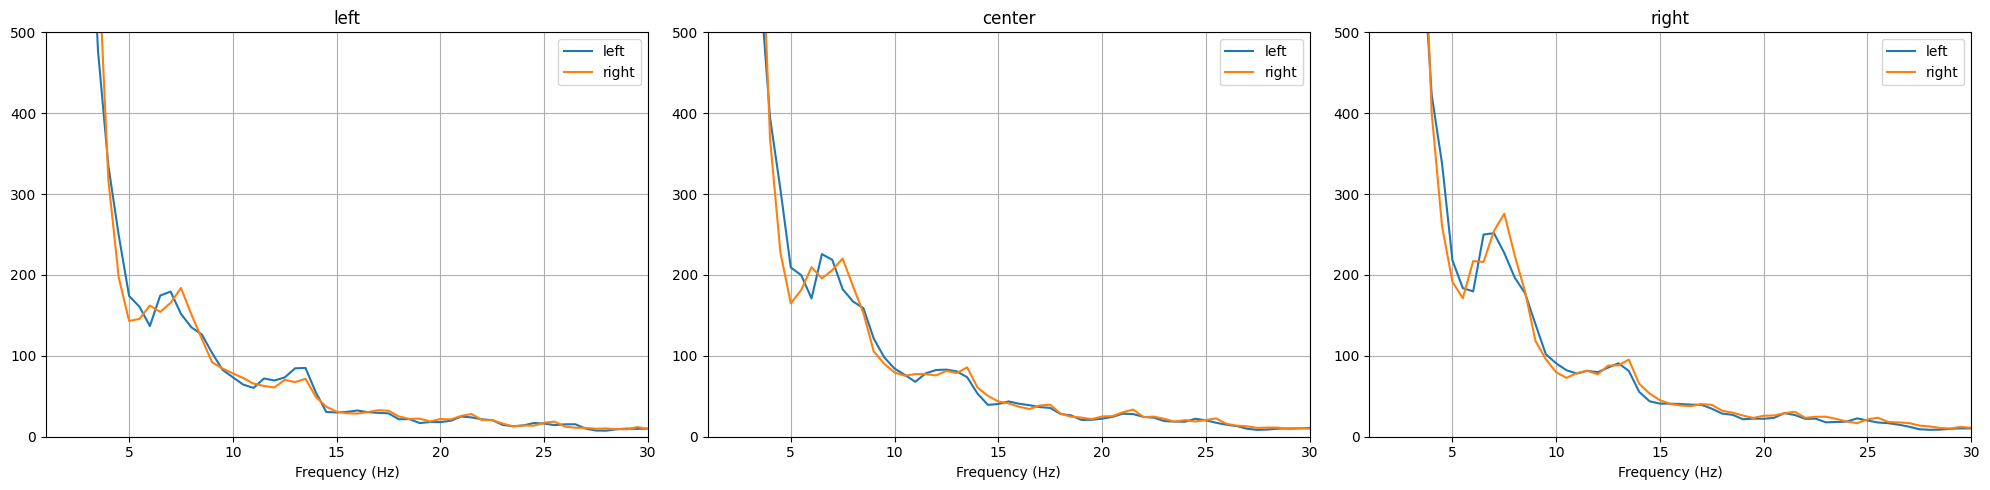

In [26]:
plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['C3', 'Cz', 'C4']],
    chan_lab=['left', 'center', 'right'],
    maxy=500
)


**Analysis of Power Spectral Density (PSD) for Motor Imagery Channels (C3, Cz, C4)**


In this analysis, we examine the Power Spectral Density (PSD) plots of EEG signals recorded during motor imagery tasks for two classes: left-hand motor imagery and right-hand motor imagery. The channels selected for analysis, C3, Cz, and C4, correspond to electrodes placed over the motor cortex, which are known to be strongly involved in motor planning and execution. These channels are typically informative when differentiating between motor imagery tasks such as left- and right-hand movements.

**General Observation of the PSD:** The PSD plots for both classes (left and right) show a clear power distribution pattern across the frequency range of 1 to 40 Hz, which is consistent with typical EEG activity. The majority of the power is concentrated in the lower frequency bands (1-20 Hz), particularly in the alpha (8-12 Hz) and beta (13-30 Hz) bands, which are most relevant for motor-related tasks.

**Low Frequency Dominance:** We observe that the PSD is highest in the lower frequency ranges (1-10 Hz) for both motor imagery tasks, particularly below 5 Hz, which is expected given that EEG signals are typically dominated by slower oscillations. These slower oscillations may reflect non-specific brain activity or background processes, but the alpha and beta ranges are where motor-related neural activity is most prominent.

Alpha and Beta Bands: Both classes show a peak in the alpha band (8-12 Hz) and beta band (13-30 Hz). This is typical in motor imagery tasks, as the mu rhythm (which lies within the alpha band) and the beta rhythm are often modulated during motor imagery. Specifically:

**Alpha Band Suppression:** During motor imagery, a suppression (or desynchronization) of the mu rhythm is often observed over the sensorimotor cortex, which reflects the brain's engagement in motor planning.
Beta Band Modulation: The beta rhythm is often related to motor planning and the maintenance of a steady motor state. The modulation in this band during motor imagery is also a critical indicator of motor cortex involvement.
Comparison Between Left and Right Motor Imagery: When comparing the left and right motor imagery classes, the power spectra are similar across the three channels. This similarity suggests that the differences between the left and right motor imagery may not be primarily captured in the power of specific frequency bands but rather in the spatial distribution of the brain activity. This aligns with the typical observation in motor imagery studies, where the difference between classes (left vs. right) is often captured by spatial patterns (as identified by methods like Common Spatial Patterns (CSP)) rather than just spectral power.

**Interpretation of Motor Imagery Channels:**

**C3 (left hemisphere): **Typically shows higher engagement during right-hand motor imagery due to contralateral brain activity (i.e., the left motor cortex controls the right hand).
**C4 (right hemisphere)**: Typically shows higher engagement during left-hand motor imagery, for the same contralateral reason.
Cz (central midline): Often acts as a neutral reference and shows balanced activity for both left- and right-hand imagery.


However, in these plots, the differences between the classes across the channels appear subtle, which may indicate the need for further spatial filtering or more advanced feature extraction techniques, such as CSP, to enhance the separability of the motor imagery classes.

**Conclusion:** The PSD analysis confirms that the alpha and beta bands are key frequencies of interest during motor imagery tasks, consistent with the literature. Although the PSD does not show drastic differences between the left and right motor imagery tasks in terms of power, this is expected as the primary differences are often spatial rather than spectral. Therefore, additional techniques such as Common Spatial Patterns (CSP) or source localization would further enhance class separability and are recommended as the next step for feature extraction.

In [27]:
import scipy.signal

def bandpass(trials, lo, hi, sample_rate):
    '''
    Designs and applies a bandpass filter to the signal.

    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEGsignal
    lo : float
        Lower frequency bound (in Hz)
    hi : float
        Upper frequency bound (in Hz)
    sample_rate : float
        Sample rate of the signal (in Hz)

    Returns
    -------
    trials_filt : 3d-array (channels x samples x trials)
        The bandpassed signal
    '''

    # The iirfilter() function takes the filter order: higher numbers mean a sharper frequency cutoff,
    # but the resulting signal might be shifted in time, lower numbers mean a soft frequency cutoff,
    # but the resulting signal less distorted in time. It also takes the lower and upper frequency bounds
    # to pass, divided by the niquist frequency, which is the sample rate divided by 2:
    a, b = scipy.signal.iirfilter(6, [lo/(sample_rate/2.0), hi/(sample_rate/2.0)])

    # Applying the filter to each trial
    ntrials = trials.shape[2]
    trials_filt = np.zeros((nchannels, nsamples, ntrials))
    for i in range(ntrials):
        trials_filt[:,:,i] = scipy.signal.filtfilt(a, b, trials[:,:,i], axis=1)

    return trials_filt

In [28]:
# Apply the function
trials_filt = {cl1: bandpass(trials[cl1], 8, 15, sample_rate),
               cl2: bandpass(trials[cl2], 8, 15, sample_rate)}

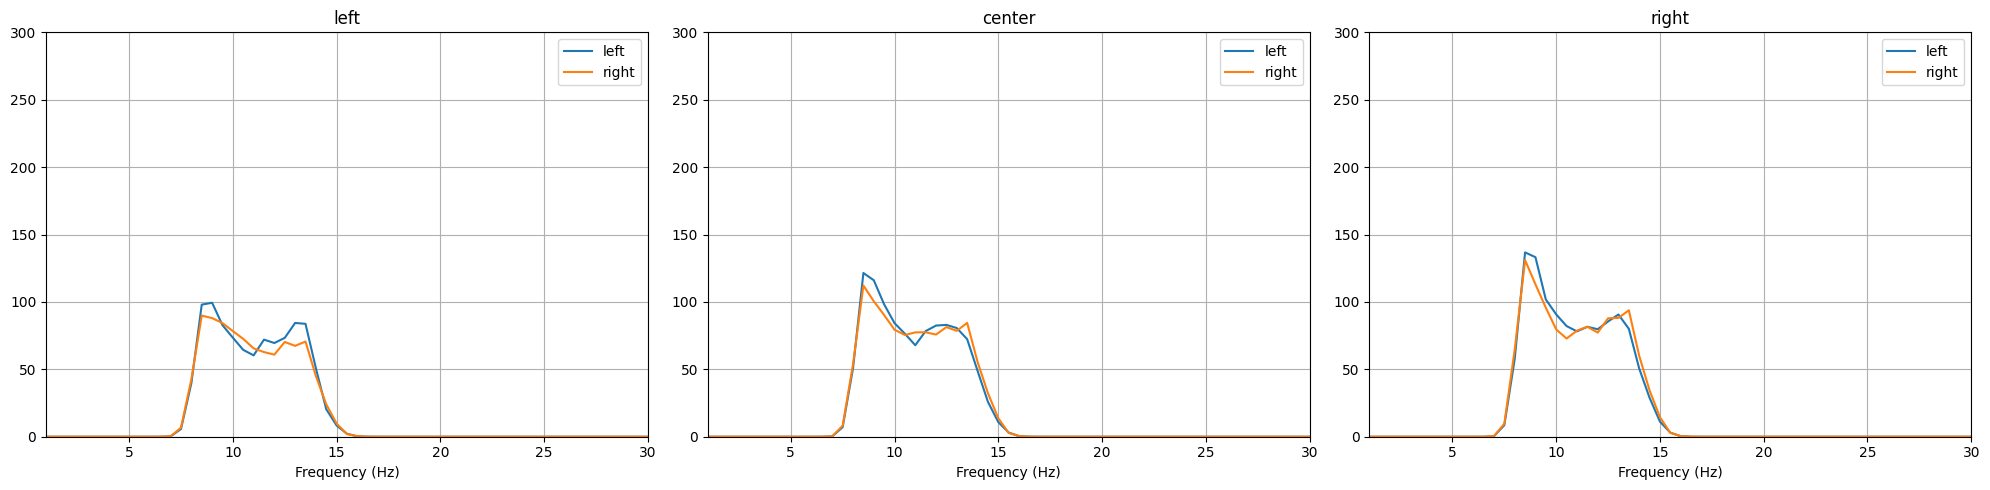

In [29]:
psd_r, freqs = psd(trials_filt[cl1])
psd_f, freqs = psd(trials_filt[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}

plot_psd(
    trials_PSD,
    freqs,
    [channel_names.index(ch) for ch in ['C3', 'Cz', 'C4']],
    chan_lab=['left', 'center', 'right'],
    maxy=300
)

In [30]:
# Calculate the log(var) of the trials
def logvar(trials):
    '''
    Calculate the log-var of each channel.

    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEG signal.

    Returns
    -------
    logvar - 2d-array (channels x trials)
        For each channel the logvar of the signal
    '''
    return np.log(np.var(trials, axis=1))

In [31]:
# Apply the function
trials_logvar = {cl1: logvar(trials_filt[cl1]),
                 cl2: logvar(trials_filt[cl2])}

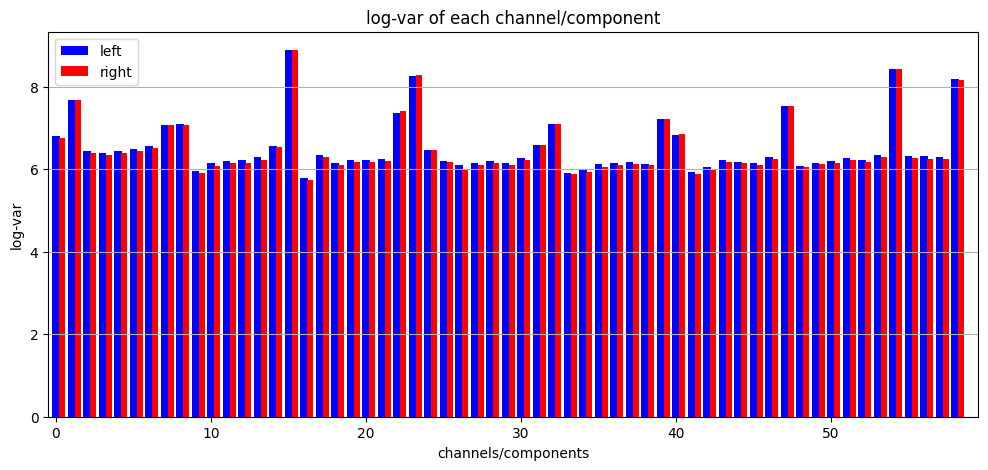

In [32]:
def plot_logvar(trials):
    '''
    Plots the log-var of each channel/component.
    arguments:
        trials - Dictionary containing the trials (log-vars x trials) for 2 classes.
    '''
    plt.figure(figsize=(12,5))

    x0 = np.arange(nchannels)
    x1 = np.arange(nchannels) + 0.4

    y0 = np.mean(trials[cl1], axis=1)
    y1 = np.mean(trials[cl2], axis=1)

    plt.bar(x0, y0, width=0.5, color='b')
    plt.bar(x1, y1, width=0.4, color='r')

    plt.xlim(-0.5, nchannels+0.5,)

    plt.gca().yaxis.grid(True)
    plt.title('log-var of each channel/component')
    plt.xlabel('channels/components')
    plt.ylabel('log-var')
    plt.legend(cl_lab)

# Plot the log-vars
plot_logvar(trials_logvar)

In [33]:
from numpy import linalg

def cov(trials):
    ''' Calculate the covariance for each trial and return their average '''
    ntrials = trials.shape[2]
    covs = [ trials[:,:,i].dot(trials[:,:,i].T) / nsamples for i in range(ntrials) ]
    return np.mean(covs, axis=0)

def whitening(sigma):
    ''' Calculate a whitening matrix for covariance matrix sigma. '''
    U, l, _ = linalg.svd(sigma)
    return U.dot( np.diag(l ** -0.5) )

def csp(trials_r, trials_f):
    '''
    Calculate the CSP transformation matrix W.
    arguments:
        trials_r - Array (channels x samples x trials) containing right hand movement trials
        trials_f - Array (channels x samples x trials) containing foot movement trials
    returns:
        Mixing matrix W
    '''
    cov_r = cov(trials_r)
    cov_f = cov(trials_f)
    P = whitening(cov_r + cov_f)
    B, _, _ = linalg.svd( P.T.dot(cov_f).dot(P) )
    W = P.dot(B)
    return W

def apply_mix(W, trials):
    ''' Apply a mixing matrix to each trial (basically multiply W with the EEG signal matrix)'''
    ntrials = trials.shape[2]
    trials_csp = np.zeros((nchannels, nsamples, ntrials))
    for i in range(ntrials):
        trials_csp[:,:,i] = W.T.dot(trials[:,:,i])
    return trials_csp

In [34]:
# Apply the functions
W = csp(trials_filt[cl1], trials_filt[cl2])
trials_csp = {cl1: apply_mix(W, trials_filt[cl1]),
              cl2: apply_mix(W, trials_filt[cl2])}

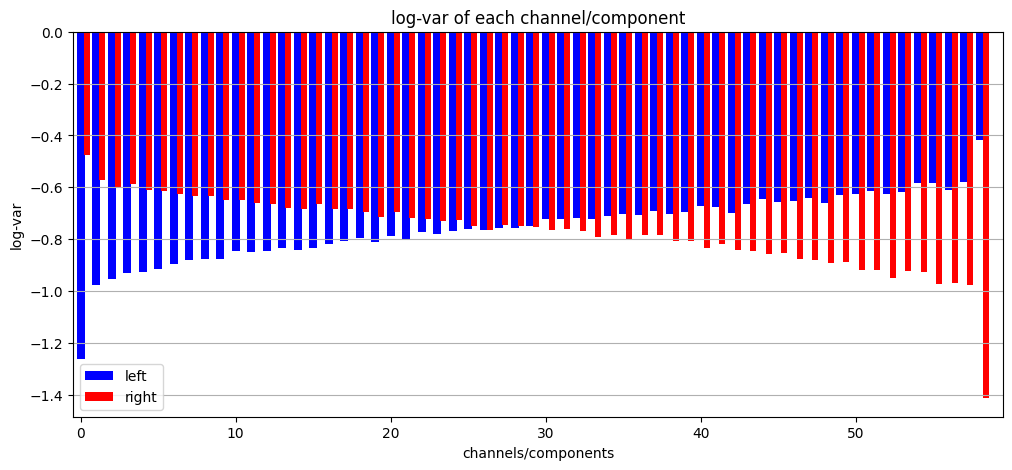

In [35]:
trials_logvar = {cl1: logvar(trials_csp[cl1]),
                 cl2: logvar(trials_csp[cl2])}
plot_logvar(trials_logvar)

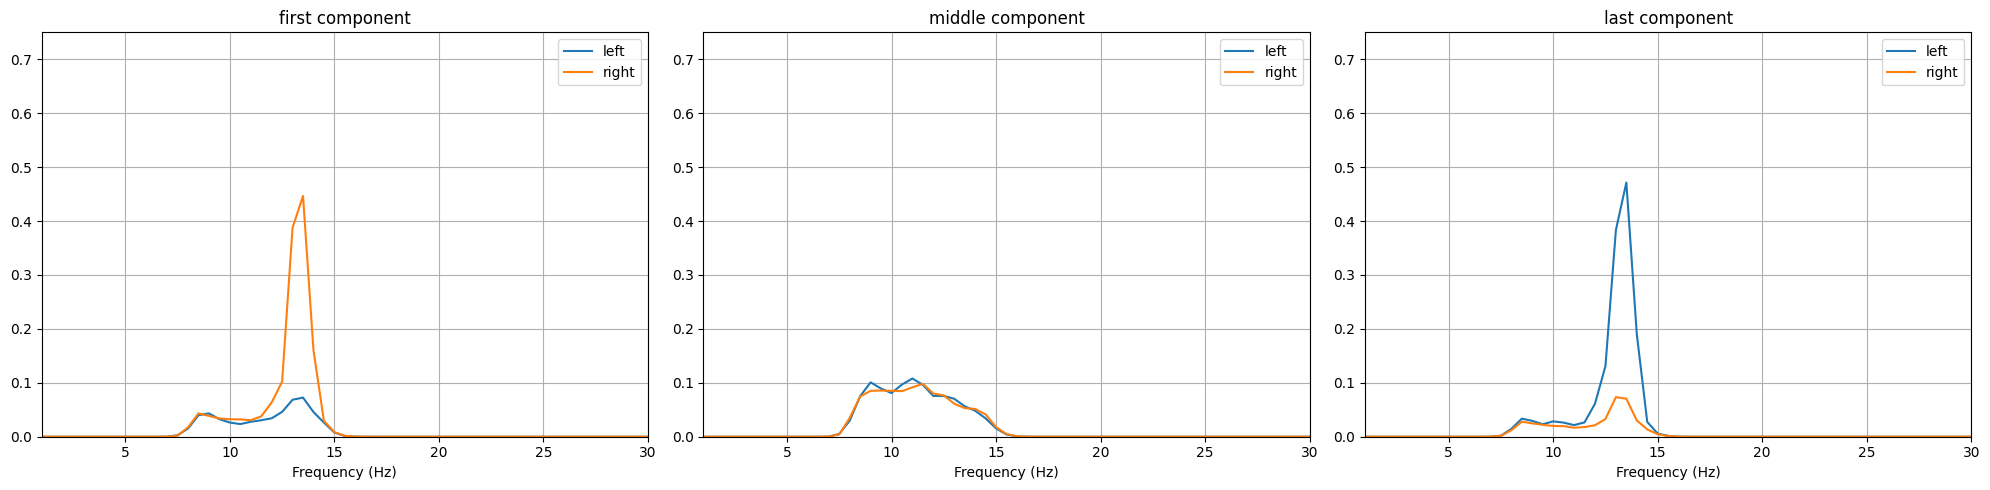

In [36]:
psd_r, freqs = psd(trials_csp[cl1])
psd_f, freqs = psd(trials_csp[cl2])
trials_PSD = {cl1: psd_r, cl2: psd_f}

plot_psd(trials_PSD, freqs, [0,28,-1], chan_lab=['first component', 'middle component', 'last component'], maxy=0.75 )

**Analysis of Common Spatial Patterns (CSP) Components with Power Spectral Density (PSD)**

In the above plots, we present the Power Spectral Density (PSD) for the first, middle, and last components obtained from the Common Spatial Patterns (CSP) applied to motor imagery EEG data.

**1. What are CSP Components?**
CSP is a powerful technique used for extracting spatial filters that maximize the variance between two classes (in this case, left vs. right motor imagery tasks). Each component in the CSP plot represents a projection of the original multi-channel EEG data onto a new space where the variance between the two conditions (left and right) is most pronounced.

The first component represents the projection that maximizes the variance for one condition (here, the 'right' task), while minimizing it for the other (here, the 'left' task).

The middle component captures mixed variance between both conditions. In practice, it may not provide clear separability.

The last component maximizes the variance for the opposite condition (here, the 'left' task) while minimizing it for the other (here, the 'right' task).

**2. First Component (Left Plot):**
In the first component, we observe that the power spectral density (PSD) for the right-hand motor imagery task (orange line) is higher around 10-15 Hz compared to the left-hand task (blue line). This indicates that the first CSP component effectively captures patterns that are more prominent in the right-hand motor imagery data, reflecting motor-related oscillatory activity in this frequency band, which may correspond to mu rhythm (8-12 Hz) or beta rhythm (12-30 Hz) suppression during motor tasks.

**3. Middle Component (Middle Plot):**
The middle component shows similar PSD values for both the left and right tasks, with no clear separation between the two conditions. This is expected as the middle CSP components tend to represent a mix of the two conditions, making it less useful for classification purposes. The low PSD values suggest that this component does not capture significant motor imagery activity in either condition.

**4. Last Component (Right Plot):**
In the last component, the PSD for the left-hand motor imagery task (blue line) is significantly higher than for the right-hand task (orange line), especially in the 10-15 Hz range. This is consistent with the goal of the last CSP component, which is to capture patterns that are more prominent in the left-hand task while minimizing variance for the right-hand task. This inverse relationship to the first component further highlights the effectiveness of CSP in separating the two motor imagery conditions.

**5. Overall Findings:**
The first and last components clearly highlight the separation between the left and right motor imagery tasks, with distinct patterns in the mu (8-12 Hz) and beta (12-30 Hz) frequency ranges.
These patterns suggest that motor imagery leads to changes in oscillatory activity, particularly in the motor cortex, and CSP is able to capture these changes effectively for classification purposes.
The middle component does not provide useful information for distinguishing between the tasks, as expected.

**6. Practical Takeaways:**
CSP provides an effective way to reduce the dimensionality of multi-channel EEG data while focusing on the most discriminative features for the task at hand.
By examining the PSD of the CSP components, we can gain insights into which frequency bands and components are most informative for separating the motor imagery tasks.

This analysis is crucial for developing robust brain-computer interfaces (BCIs) where real-time classification of motor imagery tasks is required.

In [37]:
def plot_scatter(left, foot):
    plt.figure()
    plt.scatter(left[0,:], left[-1,:], color='b')
    plt.scatter(foot[0,:], foot[-1,:], color='r')
    plt.xlabel('Last component')
    plt.ylabel('First component')
    plt.legend(cl_lab)

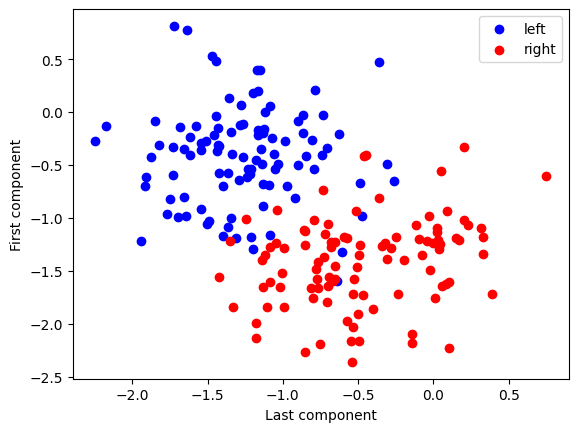

In [38]:
plot_scatter(trials_logvar[cl1], trials_logvar[cl2])

This scatter plot illustrates the log-variance of two Common Spatial Pattern (CSP) components, derived from EEG data during left-hand and right-hand motor imagery tasks. The blue dots correspond to trials from left-hand motor imagery, while the red dots represent trials from right-hand motor imagery. The two axes of the plot are the first and last CSP components, which are selected to maximize the variance between the two tasks and allow for task differentiation.

The distribution of the red dots (right-hand motor imagery) is more spread out along the X-axis, which corresponds to the last CSP component. These red points are distributed between approximately -1.5 and 0.5 on the X-axis and are concentrated toward the lower half of the plot along the Y-axis (first component). This suggests that the last CSP component effectively captures variance associated with right-hand motor imagery, although these trials do not exhibit as much separation along the Y-axis.

In contrast, the blue dots (left-hand motor imagery) are concentrated more in the upper left region of the plot. They are primarily located in the higher values of the Y-axis, clustering around 0.0 to -1.0, indicating that the first CSP component captures significant variance related to left-hand motor imagery. Additionally, the blue dots tend to be less spread along the X-axis, staying closer to the left side, which reinforces that the first component is more informative for this task.

The separation between the two classes of motor imagery (left vs. right) is primarily observed along the Y-axis, with left-hand imagery trials dominating the upper half of the plot and right-hand imagery trials located toward the lower half. The X-axis (last CSP component) further contributes to distinguishing right-hand motor imagery, but to a lesser extent compared to the Y-axis. Some overlap between the two classes is visible in the central region of the plot, indicating that while the CSP components aid in class separation, the boundary between the tasks is not entirely distinct.

In summary, the first CSP component effectively separates left-hand motor imagery from right-hand motor imagery, particularly with regard to the blue dots clustering in the upper region. The last CSP component captures variance that helps distinguish right-hand motor imagery trials, which are more spread across the lower portion of the plot. This separation is not perfect, and the plot suggests that the first CSP component holds greater significance for differentiating between these two motor imagery tasks.

In [39]:
# Percentage of trials to use for training (50-50 split here)
train_percentage = 0.5

# Calculate the number of trials for each class the above percentage boils down to
ntrain_r = int(trials_filt[cl1].shape[2] * train_percentage)
ntrain_f = int(trials_filt[cl2].shape[2] * train_percentage)
ntest_r = trials_filt[cl1].shape[2] - ntrain_r
ntest_f = trials_filt[cl2].shape[2] - ntrain_f

# Splitting the frequency filtered signal into a train and test set
train = {cl1: trials_filt[cl1][:,:,:ntrain_r],
         cl2: trials_filt[cl2][:,:,:ntrain_f]}

test = {cl1: trials_filt[cl1][:,:,ntrain_r:],
        cl2: trials_filt[cl2][:,:,ntrain_f:]}

# Train the CSP on the training set only
W = csp(train[cl1], train[cl2])

# Apply the CSP on both the training and test set
train[cl1] = apply_mix(W, train[cl1])
train[cl2] = apply_mix(W, train[cl2])
test[cl1] = apply_mix(W, test[cl1])
test[cl2] = apply_mix(W, test[cl2])

# Select only the first and last components for classification
comp = np.array([0,-1])
train[cl1] = train[cl1][comp,:,:]
train[cl2] = train[cl2][comp,:,:]
test[cl1] = test[cl1][comp,:,:]
test[cl2] = test[cl2][comp,:,:]

# Calculate the log-var
train[cl1] = logvar(train[cl1])
train[cl2] = logvar(train[cl2])
test[cl1] = logvar(test[cl1])
test[cl2] = logvar(test[cl2])

In [40]:
def train_lda(class1, class2):
    '''
    Trains the LDA algorithm.
    arguments:
        class1 - An array (observations x features) for class 1
        class2 - An array (observations x features) for class 2
    returns:
        The projection matrix W
        The offset b
    '''
    nclasses = 2

    nclass1 = class1.shape[0]
    nclass2 = class2.shape[0]

    # Class priors: in this case, we have an equal number of training
    # examples for each class, so both priors are 0.5
    prior1 = nclass1 / float(nclass1 + nclass2)
    prior2 = nclass2 / float(nclass1 + nclass1)

    mean1 = np.mean(class1, axis=0)
    mean2 = np.mean(class2, axis=0)

    class1_centered = class1 - mean1
    class2_centered = class2 - mean2

    # Calculate the covariance between the features
    cov1 = class1_centered.T.dot(class1_centered) / (nclass1 - nclasses)
    cov2 = class2_centered.T.dot(class2_centered) / (nclass2 - nclasses)

    W = (mean2 - mean1).dot(np.linalg.pinv(prior1*cov1 + prior2*cov2))
    b = (prior1*mean1 + prior2*mean2).dot(W)

    return (W,b)

def apply_lda(test, W, b):
    '''
    Applies a previously trained LDA to new data.
    arguments:
        test - An array (features x trials) containing the data
        W    - The project matrix W as calculated by train_lda()
        b    - The offsets b as calculated by train_lda()
    returns:
        A list containing a classlabel for each trial
    '''
    ntrials = test.shape[1]

    prediction = []
    for i in range(ntrials):
        # The line below is a generalization for:
        # result = W[0] * test[0,i] + W[1] * test[1,i] - b
        result = W.dot(test[:,i]) - b
        if result <= 0:
            prediction.append(1)
        else:
            prediction.append(2)

    return np.array(prediction)

In [41]:
W,b = train_lda(train[cl1].T, train[cl2].T)

print('W:', W)
print('b:', b)

W: [ 5.31347949 -5.52963938]
b: 0.38024721038083964


(-2.2, 1.0)

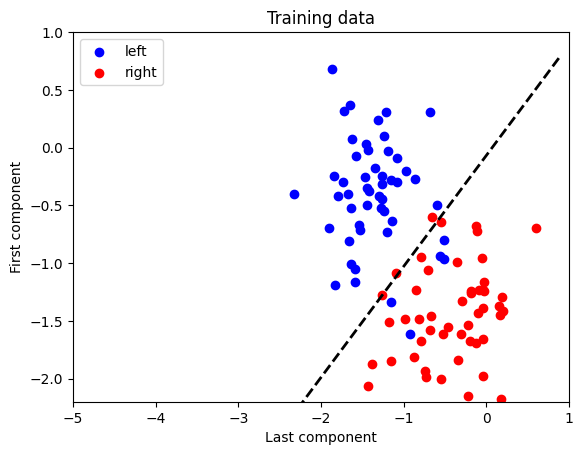

In [42]:
# Scatterplot like before
from matplotlib import mlab

plot_scatter(train[cl1], train[cl2])
plt.title('Training data')

# Calculate decision boundary (x,y)
x = np.arange(-5, 1, 0.1)
y = (b - W[0]*x) / W[1]

# Plot the decision boundary
plt.plot(x,y, linestyle='--', linewidth=2, color='k')
plt.xlim(-5, 1)
plt.ylim(-2.2, 1)

(-2.2, 1.0)

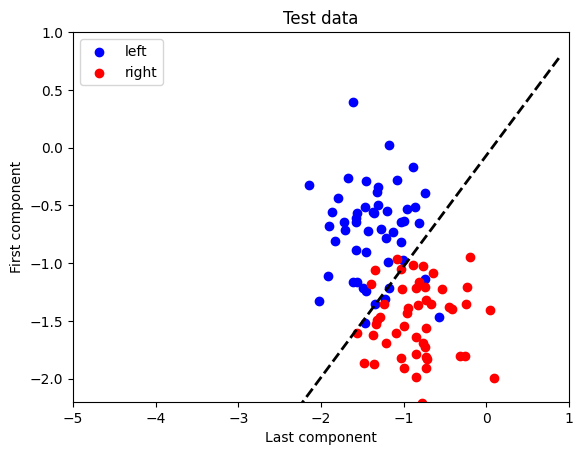

In [43]:
plot_scatter(test[cl1], test[cl2])
plt.title('Test data')
plt.plot(x,y, linestyle='--', linewidth=2, color='k')
plt.xlim(-5, 1)
plt.ylim(-2.2, 1)

In [44]:
# Print confusion matrix
conf = np.array([
    [(apply_lda(test[cl1], W, b) == 1).sum(), (apply_lda(test[cl2], W, b) == 1).sum()],
    [(apply_lda(test[cl1], W, b) == 2).sum(), (apply_lda(test[cl2], W, b) == 2).sum()],
])

print('Confusion matrix:')
print(conf)
print()
print('Accuracy: %.3f' % (np.sum(np.diag(conf)) / float(np.sum(conf))))

Confusion matrix:
[[45  4]
 [ 5 46]]

Accuracy: 0.910
